# Pan-cancer (PC) plasma proteome Paper — Figure 2-2

This Jupyter Notebook (with Python 3 kernel) contained the code for the proteomic analysis of the characteristic of the Digestive-rich

Input files:  
* The categorical clinical file: category.csv
* The continuous clinical fille: continuous.csv
* The PC proteome file: proteome.csv

Output figures:  
*  Figure 2d, S3e, S3f, S3g, S3i, S4a, S4b, S4c, S4d

In [1]:
from utils import *
paths = ['../figure/figure2', '../documents/figure2']
for path in paths:
    if not os.path.isdir(path):
        os.makedirs(path)

a = Analysis('../')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


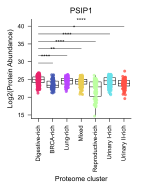

In [48]:
proteome_clusters = ['Digestive-rich', 'BRCA-rich', 'Lung-rich', 'Mixed', 'Reproductive-rich', 'Urinary I-rich', 'Urinary II-rich']
a.set_param('group', dataset_type='proteome', group_name='Proteome cluster', part_element=proteome_clusters)
plotdata, ax = a.cate(['PSIP1'], box_pairs=[('Digestive-rich', i) for i in proteome_clusters if i != 'Digestive-rich'], stripsize=3, return_data=True, quantile=True, category_type=['box', 'strip'], spines_hide=['right', 'top'])
ax = ax[0]
plotdata.to_csv('../documents/figure2/Source_data_FigS3e.csv')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel('Log2(Protein Abundance)')
ax.get_figure().savefig('../figure/figure2/FigS3e.pdf', bbox_inches='tight')

0.016863948181232942
0.00015728388575731909


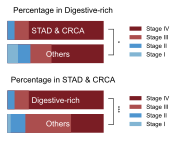

In [64]:
df = a.category[['Sample type for Figure 2', 'Proteome cluster', 'TNM stage']]
df['Sample type for Figure 2'] = df['Sample type for Figure 2'].apply(lambda x: 'zothers' if x != 'STAD&CRCA' else x)
df['Proteome cluster'] = df['Proteome cluster'].apply(lambda x: 'zothers' if x != 'Digestive-rich' else x)

tmp_df1 = df.query("`Proteome cluster`=='Digestive-rich'").drop('Proteome cluster', axis=1)
tmp_df2 = df.query("`Sample type for Figure 2`=='STAD&CRCA'").drop('Sample type for Figure 2', axis=1)
fig, axs = plt.subplots(2, 1, figsize=(2, 2.1))
plt.subplots_adjust(hspace=.5)

annots = ['STAD & CRCA', 'Digestive-rich']
for i, (annot, part_title, tmp_df, position) in enumerate(zip(annots, annots[::-1], [tmp_df1, tmp_df2], ['top', 'bottom'])):
    tmp_table = pd.crosstab(tmp_df.iloc[:, 0], tmp_df.iloc[:, 1]).sort_index(ascending=False)
    plotdata = tmp_table.div(tmp_table.sum(axis=1), axis=0).cumsum(axis=1).iloc[:, ::-1].stack().sort_index(ascending=[True, False]).reset_index()
    plotdata.to_csv(f'../documents/figure2/FigS3f_{position}_panel.csv')
    ax = barplot(plotdata, dodge=False, palette={k: a._color_map['TNM stage'][k] for k in plotdata['TNM stage'].unique()}, orient='h', spines_hide=['top', 'bottom', 'left', 'right'], ticklabels_hide=['x', 'y'], labels_hide=['x', 'y'], ax=axs[i], title='Percentage in {}'.format(part_title))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(0.4, 1.13, s='Others', c='white', fontsize=8)
    ax.text(0.25, 0.13, s=annot, c='white', fontsize=8)

    ax.plot([1.05, 1.1], [-0.05, -0.05], c='k')
    ax.plot([1.05, 1.1], [1.05, 1.05], c='k')
    ax.plot([1.1, 1.1], [-0.05, 1.05], c='k')

    from utils.eplot.base import prob_star
    _, p = tmp_table.rename(columns=lambda x: 'zothers' if x != 'Stage IV' else x).groupby('TNM stage', axis=1).sum().sort_index().pipe(scipy.stats.fisher_exact, alternative='greater')
    ax.text(x=1.15, y=0.5, s=prob_star(p), rotation='vertical')
    print(p)
fig.savefig('../figure/figure2/FigS3f.pdf', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


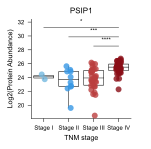

In [57]:
tnm_stage = np.sort(a.category['TNM stage'].dropna().unique())
a.set_param('group', dataset_type='proteome', group_name=['Sample type for Figure 2', 'TNM stage'], part_element=[['STAD&CRCA'], tnm_stage])

plotdata, ax = a.cate('PSIP1', category_type=['box', 'strip'], spines_hide=['right', 'top'], box_pairs=[('STAD&CRCA_Stage IV', 'STAD&CRCA_'+i) for i in tnm_stage if i != 'Stage IV'], return_data=True)
plotdata.to_csv('../documents/figure2/Source_data_Fig2d.csv')
ax = ax[0]
ax.set_xticklabels(tnm_stage.tolist())
ax.set_xlabel('TNM stage')
ax.set_ylabel('Log2(Protein Abundance)')
ax.get_figure().savefig('../figure/figure2/Fig2d.pdf', bbox_inches='tight')

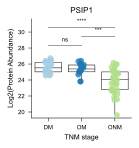

In [3]:
a.set_param('group', dataset_type='proteome', group_name='STAD&CRCA-Proteome cluster-metastasis', part_element=['DM', 'OM', 'ONM'])
plotdata, ax = a.cate('PSIP1', category_type=['box', 'strip'], quantile=True, return_data=True, spines_hide=['right', 'top'])
plotdata.to_csv('../documents/figure2/FigS3i.csv')

ax = ax[0]
ax.set_xlabel('TNM stage')
ax.set_ylabel('Log2(Protein Abundance)')
ax.get_figure().savefig('../figure/figure2/FigS3i.pdf', bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(3.5, 1.5))
plt.subplots_adjust(wspace=.5)
for ax, tumor_type in zip(axs, ['STAD', 'CRCA']):
    a.set_param('group', dataset_type='proteome', group_name=['sample_annot', 'Sample type'], part_element=[['discovery_tumor', 'discovery_normal'], [tumor_type, 'normal']])
    a._palette = [a._color_map['Sample type'][tumor_type], a._color_map['Sample type']['normal']]
    plotdata, _ = a.cate('PSIP1', ax=ax, spines_hide=['top', 'right'], inner='quart', violin_linewidth=.5, labels_hide=['x'], return_data=True, stripsize=3)
    plotdata.to_csv(f'../documents/figure2/Source_data_FigS3g_{tumor_type}.csv')
    ax.set_xticklabels([tumor_type, 'Healthy control'])
    ax.set_ylabel('$\mathregular{Log_2}$(Protein Abundance)')
fig.savefig('../figure/figure2/FigS3g.pdf', bbox_inches='tight')

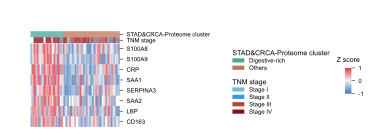

In [22]:
gene = ['S100A8', 'S100A9', 'CRP', 'SAA1', 'SERPINA3', 'SAA2', 'LBP', 'CD163']
a.set_param('group', dataset_type='proteome', group_name='STAD&CRCA-Proteome cluster', part_element=['Digestive-rich', 'Others'])
plotdata, fig = a.heat(gene, group_name=['STAD&CRCA-Proteome cluster', 'TNM stage'], figsize=(3, 2), colors_ratio=.05, return_data=True)
plotdata.to_csv('../documents/figure2/Source_data_FigS4a.csv')

fig.ax_cbar.set_title('Z score', fontsize=7)
fig.savefig('../figure/figure2/Source_data_FigS4a.pdf', bbox_inches='tight')

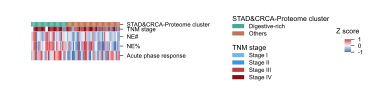

In [36]:
gene = ['NE#', 'NE%', 'GO_ACUTE_PHASE_RESPONSE']
a.set_param('group', dataset_type='continuous', group_name='STAD&CRCA-Proteome cluster', part_element=['Digestive-rich', 'Others'])
plotdata, fig = a.heat(gene, group_name=['STAD&CRCA-Proteome cluster', 'TNM stage'], data_type=['continuous', 'ssgsea'], figsize=(3, 1), colors_ratio=.1, yticklabels=['NE#', 'NE%', 'Acute phase response'], return_data=True)
plotdata.to_csv('../documents/figure2/FigS4b.csv')

fig.ax_cbar.set_title('Z score', fontsize=7)
fig.savefig('../figure/figure2/FigS4b.pdf', bbox_inches='tight')

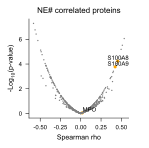

In [67]:
a.set_param('corr', name1='continuous', name2='proteome', element1='NE#', element2='all', group_name='STAD&CRCA-Proteome cluster', thresh=.5)
genes = ['S100A8', 'S100A9', 'MPO']
plotdata = a.corr_table[['spearman_rho', 'spearman_pvalues']].rename(columns={'spearman_rho': 'Spearman rho'})
plotdata['-$\mathregular{Log_{10}}$(p-value)'] = -np.log10(plotdata['spearman_pvalues'])
plotdata.loc[genes, 'hue'] = ' '
plotdata['hue'] = plotdata['hue'].fillna('zother')
plotdata['size'] = plotdata['hue']
plotdata.to_csv('../documents/figure2/Source_data_FigS4c.csv')

ax = scatterplot(plotdata.iloc[:, [0, 2, 3, 4]].sort_values('hue'), highlight_points=genes, palette=['orange', 'grey'], sizes=(2, 10), title='NE# correlated proteins', ticklabels_format=[], ticklabels_hide=[], legend=False)
ax.get_figure().savefig('../figure/figure2/FigS4c.pdf', bbox_inches='tight')

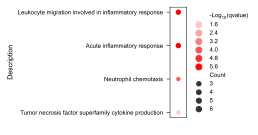

In [33]:
a.enrich('corr', query_condition="spearman_rho>0&spearman_pvalues<0.05", bg='no', tool='clusterprofiler')
a.ora.to_csv('../documents/figure2/FigS4d_enrichment.csv')

import matplotlib.colors as mcolors
cmap = mcolors.LinearSegmentedColormap.from_list("red_blue_gradient", ['#FFCACA', '#fc0000'], N=256)

term = ['leukocyte migration involved in inflammatory response', 'acute inflammatory response', 'neutrophil chemotaxis', 'tumor necrosis factor superfamily cytokine production']

plotdata = a.ora.query("Description in @term")[['Description', 'qvalue', 'Count']]
plotdata = plotdata.assign(qvalue=-np.log10(plotdata['qvalue'])).rename(columns={'qvalue': '-$\mathregular{Log_{10}}$(qvalue)'})
plotdata.insert(0, ' ', '')
plotdata.to_csv('../documents/figure2/Source_data_FigS4d.csv')

ax = scatterplot(plotdata, palette=cmap, sizes=(20, 30), ticklabels_wrap=[], ticklabels_hide=[], ticklabels_format=[], figsize=(.3, 2), spines_hide=[])
ax.set_xticks([])
ax.set_yticklabels(list(map(lambda x: x.capitalize(), term)))
ax.get_figure().savefig('../figure/figure2/FigS4d.pdf', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


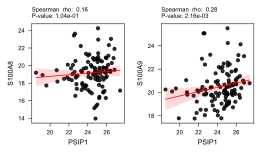

In [63]:
a.set_param('group', dataset_type='proteome', group_name='Sample type', part_element=['CRCA', 'STAD'])

fig, axs = plt.subplots(1, 2, figsize=(4, 1.8))
plt.subplots_adjust(wspace=.4)

for ax, gene in zip(axs, ['S100A8', 'S100A9']):
    df = a.merge_data_group(['PSIP1', gene]).dropna().droplevel(0)
    df.to_csv(f'../documents/figure2/Source_data_FigS5a_{gene}.csv')
    ax = regplot(df, method='spearman', ax=ax, scattersize=10)
fig.savefig('../figure/figure2/FigS5a.pdf', bbox_inches='tight')

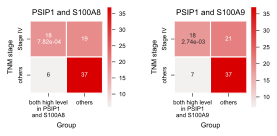

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(4.2, 1.8))
plt.subplots_adjust(wspace=.6)

for ax, gene in zip(axs, ['S100A8', 'S100A9']):
    df = a.merge_data_group(['PSIP1', gene], group_name=['TNM stage', 'Sample type']).dropna().droplevel(0)
    for i in ['PSIP1', gene]:
        df[i] = df[i].apply(lambda x: 'high' if x > df[i].median() else 'low')
    df.loc[(df['PSIP1']=='high')&(df[gene]=='high'), 'group'] = f'both high level\nin PSIP1\nand {gene}'
    df['group'] = df['group'].fillna('others')
    df = df.reset_index()[['group', 'TNM stage']].dropna()
    df['TNM stage'] = df['TNM stage'].apply(lambda x: 'Stage IV' if x == 'Stage IV' else 'others')
    table = pd.crosstab(df.iloc[:, 1], df.iloc[:, 0])
    table.to_csv(f'../documents/figure2/Source_data_FigS5b_{gene}.csv')

    _, pvalue = scipy.stats.fisher_exact(table, alternative='greater')
    annot = table.copy()
    annot.iloc[0, 0] = annot.iloc[0, 0].astype(str) + '\n {:.2e}'.format(pvalue)
    heatmap(table, annot=annot.values, ax=ax, vmax=None, vmin=None, center=None, fmt='', cmap=R_CMAP, square=True, linewidth=1, xticklabels=True)
    ax.set_title(f'PSIP1 and {gene}')
    ax.set_ylabel('TNM stage')
    ax.set_xlabel('Group')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
fig.savefig('../figure/figure2/FigS5b.pdf', bbox_inches='tight')